In [1]:
# NAME: SHRUTHI PASUMARTHI
# STUDENT ID: 801218392
# HOMEWORK 1 QUESTION 2 B - STANDARDIZATION

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
m = len(housing)
m

545

In [5]:
housing.shape

(545, 13)

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [7]:
df_test.shape

(109, 13)

In [8]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,yes,no,no,no,no,0,no,1750000
496,4000,2,1,1,yes,no,no,no,no,0,no,2695000
484,3040,2,1,1,no,no,no,no,no,0,no,2870000
507,3600,2,1,1,yes,no,no,no,no,0,no,2590000
252,9860,3,1,1,yes,no,no,no,no,0,no,4515000


In [9]:
df_Newtrain.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
df_Newtrain.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
df_Newtrain.basement.replace(('yes', 'no'), (1, 0), inplace=True)
df_Newtrain.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
df_Newtrain.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
df_Newtrain.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)
df_Newtrain

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_1464\2579499989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_1464\2579499989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_1464\2579499989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000
...,...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,1,0,1,0,1,0,1,6790000
277,10360,2,1,1,1,0,0,0,0,1,1,4305000
9,5750,3,2,4,1,1,0,0,1,1,1,9800000
359,3600,3,1,1,1,0,0,0,0,1,0,3710000


In [10]:
trainl = len(df_Newtrain)
testl = len(df_Newtest)

In [11]:
df_Newtrain.shape

(436, 12)

In [12]:
x0 = df_Newtrain.values[:,0] #area
x1 = df_Newtrain.values[:,1] #bedrooms
x2 = df_Newtrain.values[:,2] #bathrooms
x3 = df_Newtrain.values[:,3] #stories
x4 = df_Newtrain.values[:,4] #mainroad
x5 = df_Newtrain.values[:,5] #guestroom
x6 = df_Newtrain.values[:,6] #basement
x7 = df_Newtrain.values[:,7] #Hotwater heating
x8 = df_Newtrain.values[:,8] #airconditioning
x9 = df_Newtrain.values[:,9] #parking
x10 = df_Newtrain.values[:,10] #prefarea

y = df_Newtrain.values[:,11] #price

In [13]:
x0 = x0.reshape(trainl, 1) 
x1 = x1.reshape(trainl, 1) 
x2 = x2.reshape(trainl, 1) 
x3 = x3.reshape(trainl, 1) 
x4 = x4.reshape(trainl, 1)
x5 = x5.reshape(trainl, 1)
x6 = x6.reshape(trainl, 1)
x7 = x7.reshape(trainl, 1)
x8 = x8.reshape(trainl, 1)
x9 = x9.reshape(trainl, 1)
x10 = x10.reshape(trainl, 1)

y = y.reshape(trainl,1)

In [14]:
x00 = np.ones((trainl, 1))
X = np.hstack((x00, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
df_Newtrain.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000


In [16]:
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta.shape

(12, 1)

In [17]:
def compute_cost (X, y, theta):
    h = X.dot(theta)
    j = np.subtract(h, y)
    j2 = np.square(j)
    J = 1/(2*m) * np.sum(j2)
    
    return J

In [18]:
cost = compute_cost(X, y, theta)
print('The cost for the given values of theta are: ', cost)

The cost for the given values of theta are:  0.4000000000000001


In [19]:
y_test = df_Newtest['price']
x_test = df_Newtest[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
print(x_test.head(5))
print(y_test.head(5))

      area  bedrooms  bathrooms  stories  parking
239   4000         3          1        2        1
113   9620         3          1        1        2
325   3460         4          1        2        0
66   13200         2          1        1        1
479   3660         4          1        2        0
239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64


In [20]:
yt = y_test.values

In [21]:
x0t = x_test.values[:,0]
x1t = x_test.values[:,1]
x2t = x_test.values[:,2]
x3t = x_test.values[:,3]
x4t = x_test.values[:,4]
x5t = x_test.values[:,0]
x6t = x_test.values[:,1]
x7t = x_test.values[:,2]
x8t = x_test.values[:,3]
x9t = x_test.values[:,4]
x10t = x_test.values[:,0]


In [22]:
x0t = x0t.reshape(testl, 1) 
x1t = x1t.reshape(testl, 1) 
x2t = x2t.reshape(testl, 1) 
x3t = x3t.reshape(testl, 1) 
x4t = x4t.reshape(testl, 1) 
x5t = x5t.reshape(testl, 1) 
x6t = x6t.reshape(testl, 1)
x7t = x7t.reshape(testl, 1)
x8t = x8t.reshape(testl, 1)
x9t = x9t.reshape(testl, 1) 
x10t = x10t.reshape(testl, 1) 
yt = yt.reshape(testl,1)

In [23]:
x00t = np.ones((testl,1))
Xt = np.hstack((x00t, x0t, x1t, x2t, x3t, x4t, x5t, x6t, x7t, x8t, x9t, x10t)) 

In [24]:
Xt = scaler.fit_transform(Xt)
yt = scaler.fit_transform(yt)

In [25]:
def gradient_descent(X, y, theta, alpha, iterations, Xt, yt): 
    cost_history = np.zeros(iterations) 
    valcost_history = np.zeros(iterations)
    for i in range(iterations):
        #h = theta1.x1 + x0
        h = X.dot(theta) 
        #Loss = h-y
        j = np.subtract(h, y)
        #For the derivative of j wrt theta
        sum_delta = (alpha / m) * X.transpose().dot(j); 
        #Updating the new theta
        theta = theta - sum_delta;
        #Saving it in the history array
        cost_history[i] = compute_cost(X, y, theta)
        valcost_history[i] = compute_cost(Xt, yt, theta)
 
    return theta, cost_history, valcost_history 

In [26]:
theta = np.zeros(12)
theta = theta.reshape(12, 1)
iterations = 1500; 
alpha = 0.01; 

In [27]:
theta, cost_history, valcost_history = gradient_descent(X, y, theta, alpha, iterations, Xt, yt)
print("Final cost of theta: ", theta)
print('Cost_history: '), cost_history
print('ValCost_history: '), valcost_history

Final cost of theta:  [[0.        ]
 [0.2865717 ]
 [0.05699363]
 [0.26020529]
 [0.20031283]
 [0.08605175]
 [0.08786896]
 [0.08717977]
 [0.12650207]
 [0.21971098]
 [0.11181998]
 [0.16037174]]
Cost_history: 
ValCost_history: 


(None,
 array([0.09703807, 0.094207  , 0.09150148, ..., 0.04872512, 0.04872515,
        0.04872519]))

Text(0.5, 1.0, 'Convergence of gradient descent')

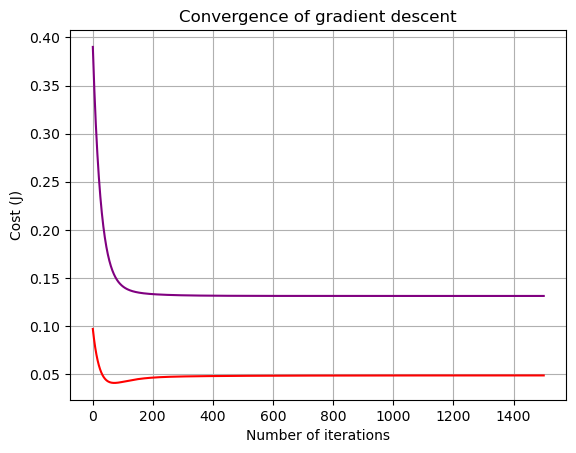

In [28]:
plt.plot(range(1, iterations + 1),cost_history, color='purple') 
plt.plot(range(1, iterations + 1),valcost_history, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 